In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
a1 = np.array([0,3,5])
a2 = np.array([4,7,0])
a3 = np.array([9,8,1])
a4 = np.array([2,5,3])
A = [a1,a2,a3,a4]

# Расстояние Евклида для a1 a2
print(np.linalg.norm(a1-a2))
# Квадрат Евклидова расстояния для a2 a3
print(np.linalg.norm(a2-a3) ** 2)
# Расстояние Чебышева для a3 a4
print(np.linalg.norm(a3-a4, ord=np.inf))
# Расстояние Хэмминга для a4 a1
print(np.linalg.norm(a4-a1, ord=1))

7.54983443527075
27.0
7.0
6.0


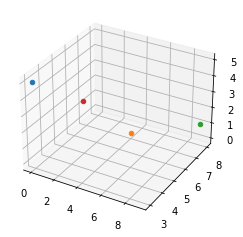

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for element in A:
    ax.scatter(element[0],element[1],element[2])
plt.show()

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size=0.20
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
134,6.1,2.6,5.6,1.4
72,6.3,2.5,4.9,1.5
98,5.1,2.5,3.0,1.1
109,7.2,3.6,6.1,2.5
12,4.8,3.0,1.4,0.1


In [11]:
y_train.head()

134     virginica
72     versicolor
98     versicolor
109     virginica
12         setosa
Name: species, dtype: object

In [23]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array(['setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

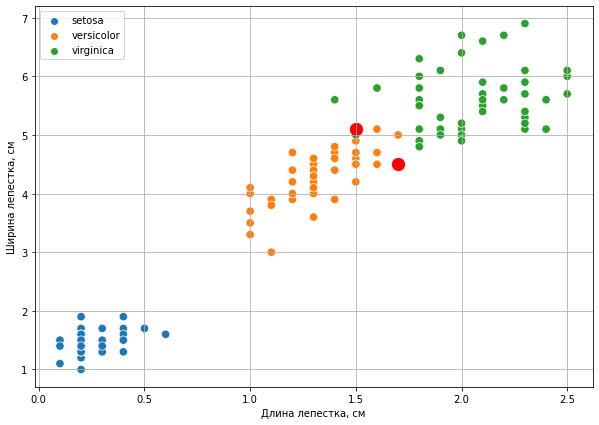

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i,3], X_test.iloc[i, 2], color='red',s=150)

In [20]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, y_pred) : .3}')

accuracy:  0.933


accuracy:  0.933


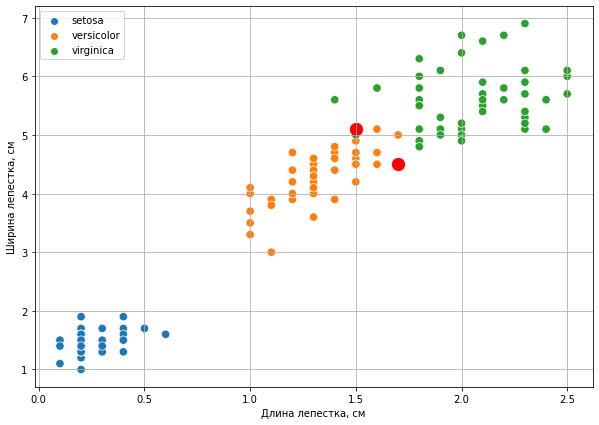

In [33]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10,7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i,3], X_test.iloc[i, 2], color='red',s=150)
print(f'accuracy: {accuracy_score(y_test, y_pred) : .3}')

accuracy:  0.967


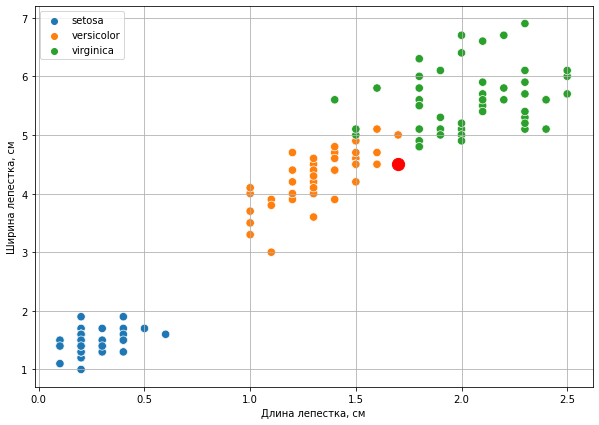

In [32]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10,7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i,3], X_test.iloc[i, 2], color='red',s=150)
print(f'accuracy: {accuracy_score(y_test, y_pred) : .3}')

accuracy:  0.967


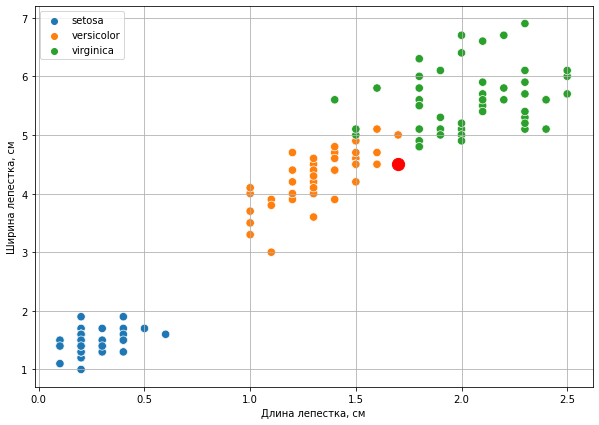

In [31]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10,7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i,3], X_test.iloc[i, 2], color='red',s=150)

print(f'accuracy: {accuracy_score(y_test, y_pred) : .3}')

accuracy:  1.0


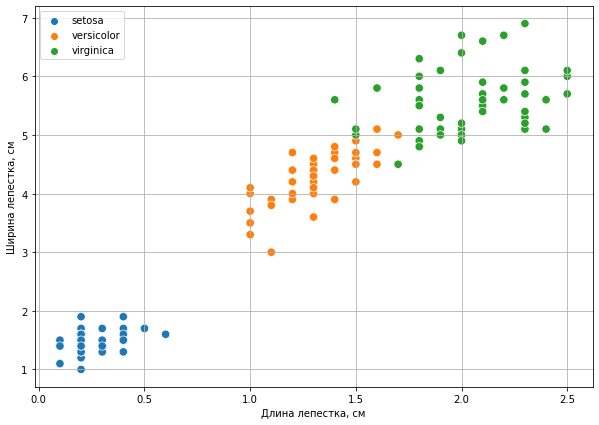

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size=0.15
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10,7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i,3], X_test.iloc[i, 2], color='red',s=150)
print(f'accuracy: {accuracy_score(y_test, y_pred) : .3}')

In [1]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"карие": 1, "зеленые": 0, "серые": 0, "голубые": 0},
             {"карие": 0, "зеленые": 1, "серые": 0, "голубые": 0},
             {"карие": 0, "зеленые": 0, "серые": 0, "голубые": 1},
             {"карие": 0, "зеленые": 0, "серые": 1, "голубые": 1},
             {"карие": 0, "зеленые": 1, "серые": 0, "голубые": 1}]
dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
features

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [1., 1., 0., 0.]])